In [1]:
import skimage
import selective_search
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load image
image = skimage.data.astronaut()
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)

In [2]:
# Propose boxes using selective search
boxes = selective_search.selective_search(image, mode='fast')

/zhome/7a/d/164695/venvs/P1_classification_dlcv/lib/python3.10/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


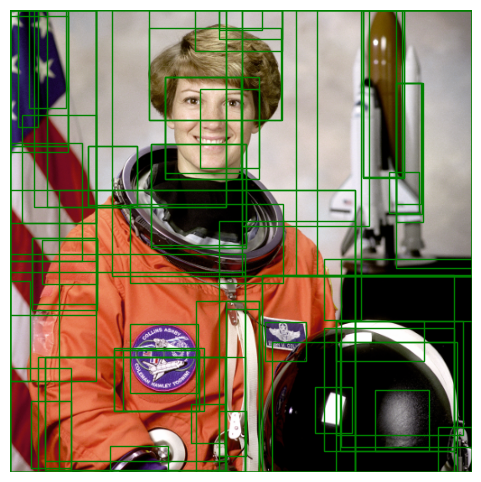

In [3]:
boxes_filter = selective_search.box_filter(boxes, min_size=20, topN=80)
# drawing rectangles on the original image
fig, ax = plt.subplots(figsize=(6, 6))
for x1, y1, x2, y2 in boxes_filter:
    bbox = mpatches.Rectangle(
        (x1, y1), (x2-x1), (y2-y1), fill=False, edgecolor='green', linewidth=1)
    ax.add_patch(bbox)
plt.axis('off')
plt.show()

With our data
### Get images from annotations.json and resize them

In [2]:
import os
import torch
import numpy as np

import skimage.io
import json

dataset_path = r'/work3/s212725/WasteProject/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    print('Reading annotations file: ' + anns_file_path)
    annotations = json.load(f)
    images = annotations['images']

Reading annotations file: /work3/s212725/WasteProject/data/annotations.json


In [2]:
print(images[0])

{'id': 0, 'width': 1537, 'height': 2049, 'file_name': 'batch_1/000006.jpg', 'license': None, 'flickr_url': 'https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png', 'coco_url': None, 'date_captured': None, 'flickr_640_url': 'https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg'}


In [ ]:
for i in enumerate(len(images)):
    

### Resized maintaining aspect ratio

In [3]:
from PIL import Image

def resize_image(image_path):
    with Image.open(image_path) as image:
        # Get original size
        width, height = image.size

        # Determine which dimension to resize based on maximum dimension
        if width > height and width > 480:
            ratio = 480.0 / width
            new_size = (int(width * ratio), int(height * ratio))
        elif height > width and height > 480:
            ratio = 480.0 / height
            new_size = (int(width * ratio), int(height * ratio))
        else:
            return image

        # Resize image with new size and preserve aspect ratio
        resized_image = image.resize(new_size, Image.ANTIALIAS)

        return resized_image

/tmp/ipykernel_11303/4214172810.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


The image has been resized to shape: (360, 480)


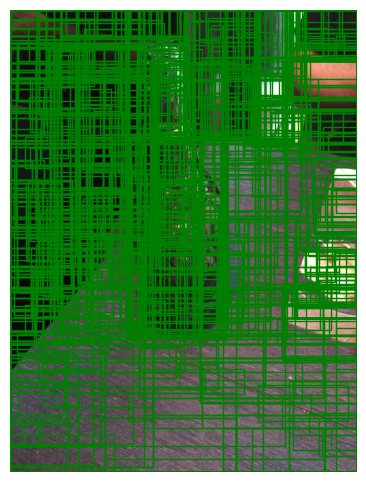

In [35]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import selective_search
import matplotlib.patches as mpatches

for i in range(len(images)):
    file_name = images[i]['file_name']
    image_path = dataset_path + '/' + file_name
    fig, ax = plt.subplots(figsize=(6, 6))
    resized_image = resize_image(image_path)
    ax.imshow(resized_image)
    print(f"The image has been resized to shape: {resized_image.size}" )
    image = np.array(resized_image)
    # Propose boxes using selective search
    boxes = selective_search.selective_search(image, mode='fast')
    boxes_filter = selective_search.box_filter(boxes, min_size=20, topN=1000)
    # drawing rectangles on the original image

    for x1, y1, x2, y2 in boxes_filter:
        bbox = mpatches.Rectangle(
            (x1, y1), (x2-x1), (y2-y1), fill=False, edgecolor='green', linewidth=1)
        ax.add_patch(bbox)
    plt.axis('off')
    plt.show()
    break

/tmp/ipykernel_13433/4214172810.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


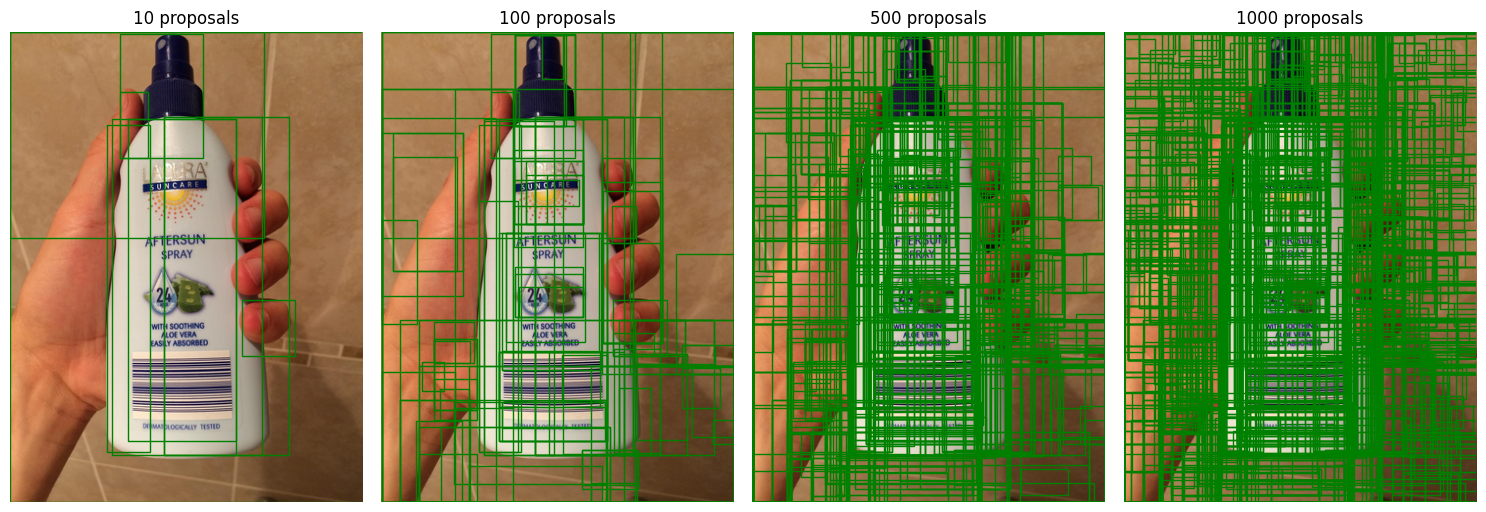

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import selective_search
import matplotlib.patches as mpatches

# Load the image
file_name = images[14]['file_name']
image_path = dataset_path + '/' + file_name
resized_image = resize_image(image_path)
image = np.array(resized_image)

# Define the number of proposals to test
num_proposals = [10, 100, 500, 1000]

# Plot the results for each number of proposals
fig, axes = plt.subplots(nrows=1, ncols=len(num_proposals), figsize=(15, 5))

for i, n in enumerate(num_proposals):
    # Run selective search with the current number of proposals
    boxes = selective_search.selective_search(image, mode='fast')
    boxes_filter = selective_search.box_filter(boxes, min_size=20, topN=n)

    # Draw the boxes on the image
    ax = axes[i]
    ax.imshow(image)
    ax.set_title(f"{n} proposals")
    for x1, y1, x2, y2 in boxes_filter:
        bbox = mpatches.Rectangle(
            (x1, y1), (x2-x1), (y2-y1), fill=False, edgecolor='green', linewidth=1)
        ax.add_patch(bbox)
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.savefig("region_proposal_example14.png")
